对数据集进行处理作为预备。

In [1]:
# 加载原始的、有缺失值的数据集
data("PimaIndiansDiabetes2", package = "mlbench")
dim(PimaIndiansDiabetes2)
## [1] 768   9
str(PimaIndiansDiabetes2)

[1] 768   9

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 NA 70 96 ...
 $ triceps : num  35 29 NA 23 35 NA 32 NA 45 NA ...
 $ insulin : num  NA NA NA 94 168 NA 88 NA 543 NA ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 NA ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 5 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 35 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 227 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 374 rows containing missing values"
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
"Removed 11 rows containing missing values"
Warning message:
"Removed 5 rows containing missing values or values outside the scale range
(`geom_point()`)."
Warning message:
"Removed 5 rows containing non-finite outside the scale range
(`stat_density()`)."
Warning message in ggally_

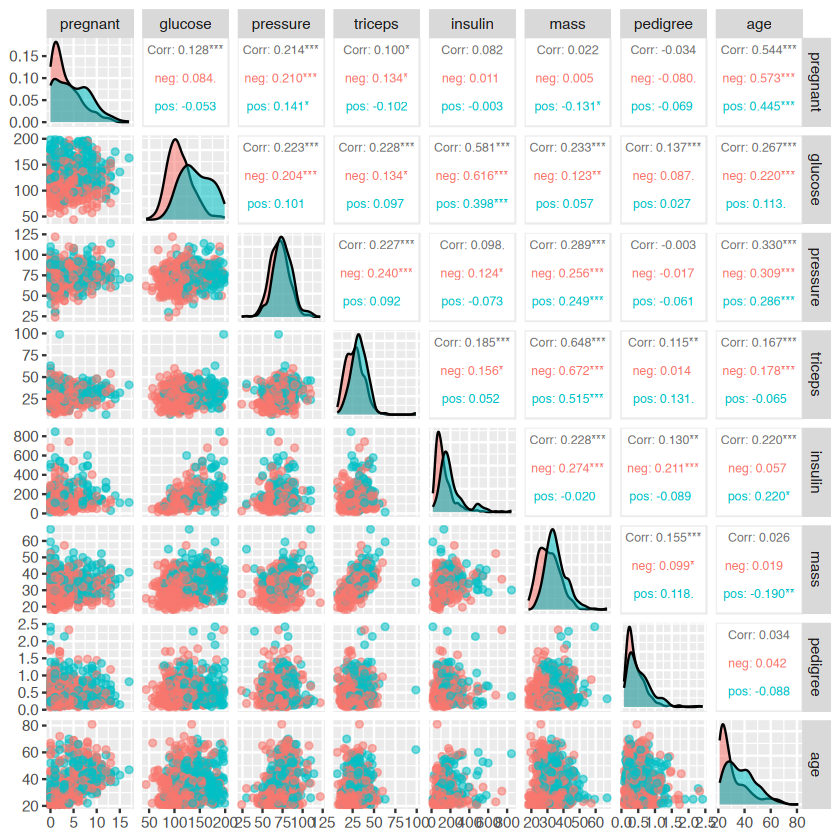

In [2]:
library(GGally)
ggpairs(PimaIndiansDiabetes2,columns = c(1:8),
        mapping=aes(color=diabetes,alpha=0.3),
        upper = list(
          continuous = wrap("cor", size = 2.5) # 改变correlation的font size
        )
        )

Warning message:
"Removed 5 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 35 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 227 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 374 rows containing non-finite outside the scale range
(`stat_boxplot()`)."
Warning message:
"Removed 11 rows containing non-finite outside the scale range
(`stat_boxplot()`)."


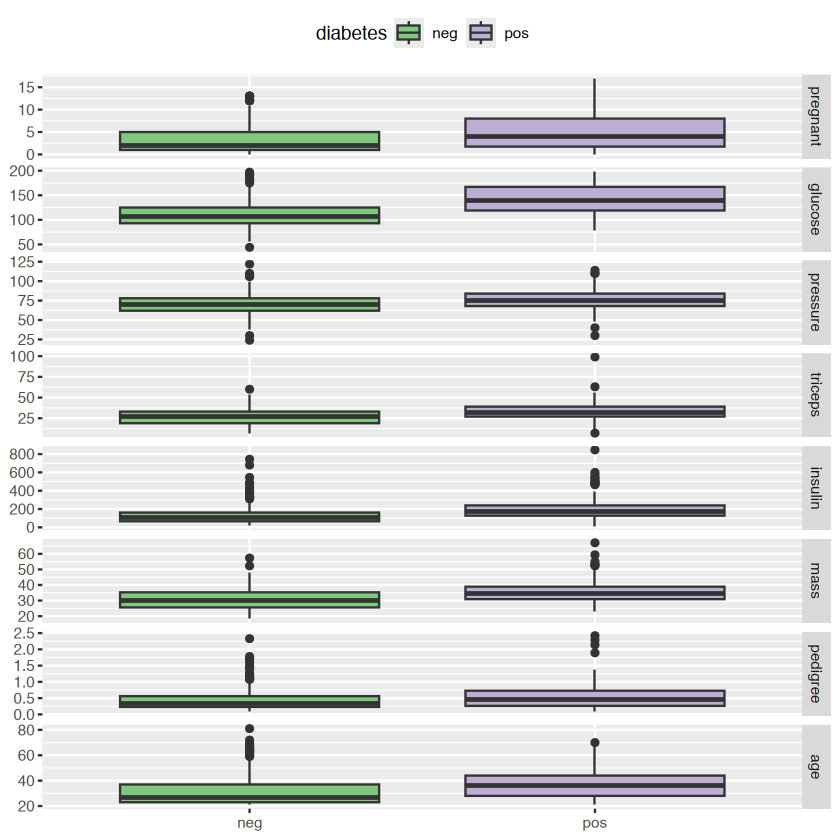

In [3]:
ggbivariate(PimaIndiansDiabetes2, outcome = "diabetes")+
  scale_fill_brewer(type = "qual")

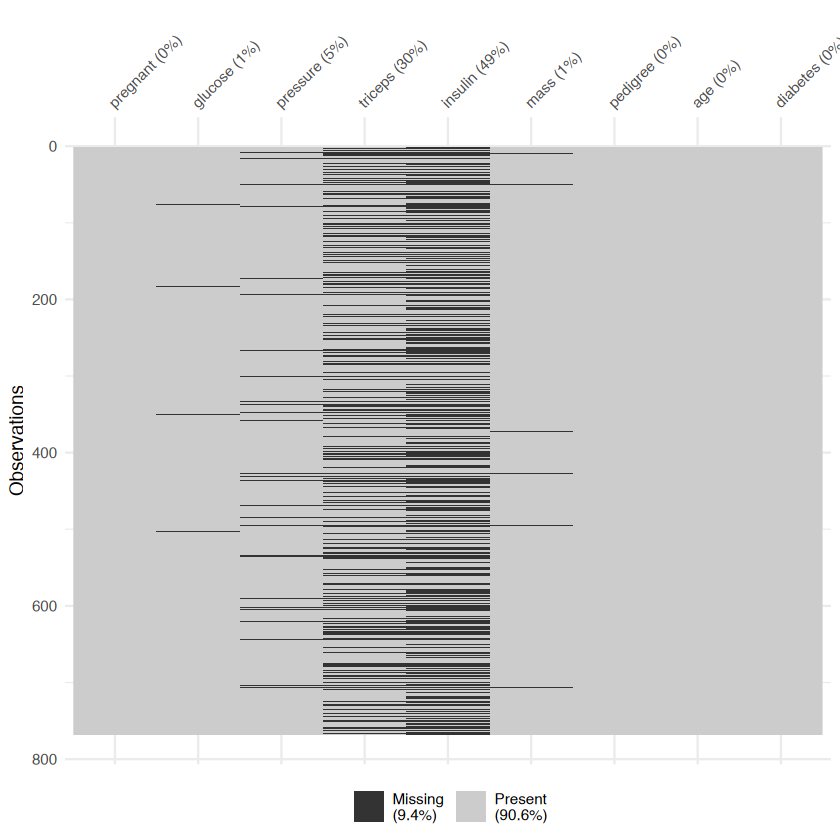

In [4]:
library(visdat)
#vis_dat(PimaIndiansDiabetes2)
vis_miss(PimaIndiansDiabetes2)

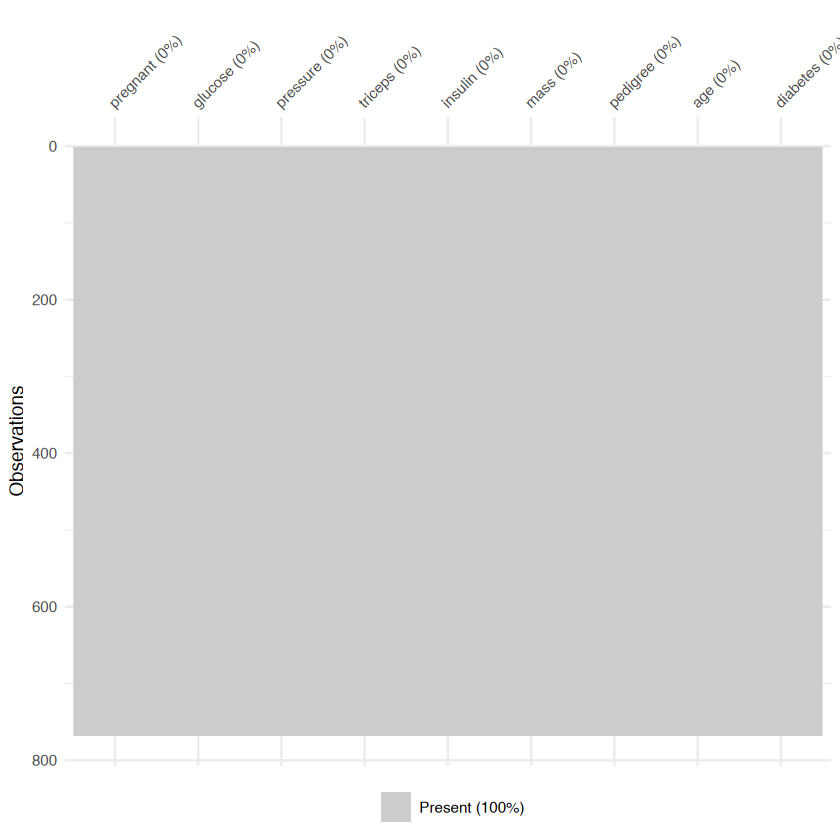

In [5]:
library(missForest)

set.seed(1234)
pimadiabetes <- missForest(PimaIndiansDiabetes2)$ximp

# 没有缺失值了
vis_miss(pimadiabetes)

In [6]:
levels(pimadiabetes$diabetes) <- c("pos","neg")
str(pimadiabetes)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 ...
 $ triceps : num  35 29 22.3 23 35 ...
 $ insulin : num  190.5 60.8 229.9 94 168 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "pos","neg": 2 1 2 1 2 1 2 1 2 2 ...


In [8]:
save(pimadiabetes, file = "data/pimadiabetes.rdata")